# 支持向量机 SVM -- 专注线性不可分

又到了作者绞尽脑汁给小 C 设计任务的时候了， 这一次需要帮助的是小 C 的室友小 D。

小 D 最近也交了一个女朋友，但是这个女孩好像非常情绪化，喜怒无常，让小 D 捉摸不透。

面对如此棘手难题，小 D 只好来请教小 C。 当然对于小 C 来说。

当然对于小 C 来说，这个问题也很难办， 因为小 D 女朋友的情绪完全不是 “线性可分”的，

于是小 C 想到了 SVM 算法，也就是大名鼎鼎的 -- 支持向量机。

## 支持向量机 SVM 基本概念

### 支持向量机 SVM 的原理

首先，我们要先了解一下什么是“线性可分”和“线性不可分”。

举个例子，我们知道男生是很简单的动物，假设，只是假设，

男生的情绪分布如图 。。。 所示。

可以看到，当我们提取样本特征“是否有妹子”和“是否有好吃的”

这两项的时候，能够很容易用图中的直线把男生的情绪分成 “开心” 和 “不开心”

两类， 这种情况下我们说样本是线性可分的。

但是呢，女生的情绪可能要复杂很多，有时候从男生的角度来看，她们的情绪分布可能如图（非线性）。。。所示。

从图中我们已经可以感受到线性模型 “深深的绝望”了， 无论是用哪一条直线，都将无法将女生的情绪进行正确的分类。

在这种情况下，我们说样本是线性不可分的。

那怎么办？ 是不是就真的束手无策了呢？

不要怕！ 我们有强大的 SVM 支持向量机，它的核函数功能可以帮助到我们。

现在大家想象一下，假如“开心”的情绪是轻飘飘的，而不开心的情绪是沉重的，

我们把图扔到水里， “开心”就会漂浮起来，而“不开心”就会沉下去，变成如图。。。所示。

从图中，我们看到，经过处理之后的数据，很容易用一块玻璃板将两种心情进行分类了。

如果从正上方向下看，将三维视图还原成二维， 那么你可能会发现分类器是分类器是图。。。的样子。

如果这样看起来的话， 这一点也不像是线性分类器的样子了。

而刚才我们通过利用 “开心” 和 “不开心” 的重量差实现将二维数据变成三维的过程。

称为将数据投射至高维空间。这正是 SVM 算法的核函数（kernel trick）功能，

在 SVM 中用得最普遍的两种把数据投射到高维空间的方法分别是多项式内核（Polynomial kernal）

和径向基内核 （Radial basis function kernal, RBF）。

其中多项式内核比较容易理解，它是通过把样本原始特征进行乘方来把数据投射到高维空间，

比如特征 1 乘 2 次方、特征 2 乘 3 次方， 特征 3 乘 5 次方等。

而 RBF 内核也被称为高斯内核（Gaussian kernal），

接下来我们详细介绍一下 RBF 内核。

### 支持向量机 SVM 等核函数

在 SVM 算法中，训练模型等过程实际上是对每个数据点对于数据分类决定边界的重要性进行判断。

也就是说，在训练数据集中，只有一部分数据对于边界确定是有帮助的，

而这些数据对于边界的确定是有帮助的， 而这些数据点就是正好位于决定边界上的。

这些数据被称为 “支持向量”（surport vectors）， 这也是“支持向量机”名字的由来。

下面我们用图像来直观理解一下。

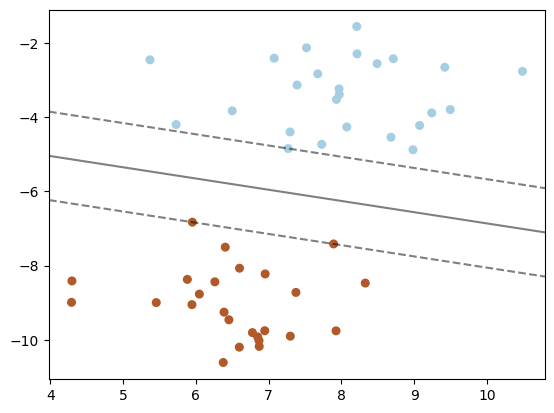

In [2]:
# 导入 numpy
import numpy as np
# 导入画图工具
import matplotlib.pyplot as plt
# 导入支持向量机 SVM
from sklearn import svm
# 导入数据集生成工具
from sklearn.datasets import make_blobs

# 先创建 50 个数据点，让它们分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# 创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# 建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 生成两个等差数列
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--','-','--'])

ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
    linewidths=1, facecolors='none')

plt.show()




【结果分析】从图中，可以清晰地看到，在分类器两侧分别有两条虚线，

那些正好压在虚线上的数据点，就是我们刚刚提到支持向量。

而本例使用使用的这种方法为 “最大边界间接超平面” （Maximum Margin Separating Hyperplane）。

指的是说中间这条实线 （在高维数据中是一个超平面），和所有支持向量之间的距离，都是最大的。

如果我们把 SVM 的内核换成是 RBF，会得到怎样的结果呢？下面我们输入代码如下：

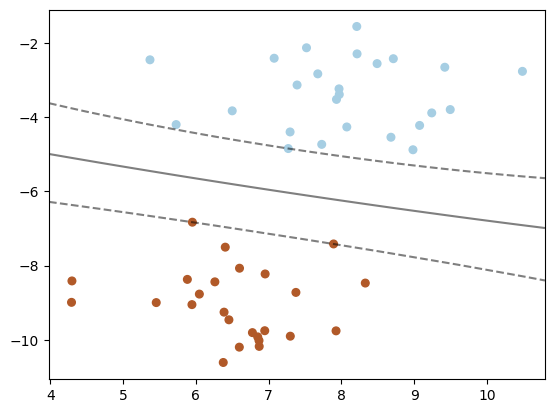

In [3]:
# 创建一个 RBF 内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)

# 把数据点画出来
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# 建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 生成两个等差数列
# 生成两个等差数列
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--','-','--'])

ax.scatter(clf_rbf.support_vectors_[:,0], clf_rbf.support_vectors_[:,1], s=100,
    linewidths=1, facecolors='none')

plt.show()

【结果分析】中图中， 我们看到分类器的样子变得完全不一样了，这是因为当我们使用 RBF 内核的时候，

数据点之间的距离是用如下公式计算的：

k_rbf(x1, x2) = exp(r||x1 - x2||^2)

公式中的 x1 和 x2 代表两个不同的数据点，而 ||x1 - x2|| 代表两个点之间的欧几里得距离。

r（gamma） 是用来控制 RBF 内核宽度的参数， 也就是图中实践距离两条虚线的距离。

## SVM 的核函数与参数选择

### 不同核函数的 SVM 对比

在这里要特别指出的是，我们在第四章线性模型中，

提到过一个 linearSVM 的算法，实际上，linearSVM 就是一种使用了线性内核的 SVM 算法。

不过 linearSVM 不支持对核函数进行修改，因为它默认只能使用线性内核。

为了让大家能够直观体验不同内核的 SVM 算法在分类中的不同表现，

我们画个图像来进行展示

/usr/local/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


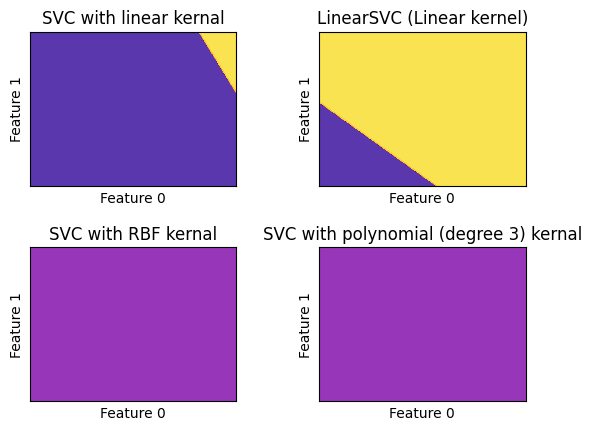

In [6]:
# 导入红酒数据集
from sklearn.datasets import load_wine
# 定义一个函数用来画图
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(
        np.arange(y_min, y_max, h),
        np.arange(x_min, x_max, h)
    )
    return xx, yy

# 定义一个绘制等高线的函数
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 使用酒的数据集
wine = load_wine()
# 选取数据集的两个特征
X = wine.data[:, :2]
y = wine.target

C = 1.0  # SVM 的正则化参数
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C),
    svm.SVC(kernel='rbf', gamma=0.7, C=C),
    svm.SVC(kernel='poly', degree=3, C=C)
)
models = (clf.fit(X,y) for clf in models)

# 设定图题
titles = ('SVC with linear kernal',
    'LinearSVC (Linear kernel)',
    'SVC with RBF kernal',
    'SVC with polynomial (degree 3) kernal')

# 设定一个子图形的个数和排列方式
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# 使用前面定义的函数进行画图
X0, X1 = X[:,0],X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

【结果分析】从图中，我们可以看到线性内核的 SVC 与 LinearSVC 得到的结果非常接近，

但仍然有一点点差别。其中一个原因是 linearSVC 对 L2 范数进行最小化，

而线性内核的 SVC 是对 L1 范数进行最小化。 不论如何， LinearSVC 和线性内核的 SVC 生成的决定边界都是线性的，

在更高维数据集中将会是相交的超平面（请读者朋友自行想象）。

而 RBF 内核的 SVC 和 polynomial 内核的 SVC 分类器的决定边界则完全不是线性的，

它们更加弹性。而决定了它们决定边界形成的，就是它们的参数。

在 polynominal 内核的 SVC 中， 起决定性作用的参数就是 degree 和正则化参数 C，

在本例中我们使用的 degree 为 3，也就是对原始数据集的特征进行乘 3 次方操作。

而在 RBF 内核的 SVC 中起决定性作用的是正则化参数 C 和参数 gamma， 

接下来我们重点介绍一下 RBF 内核 SVC 的 gamma 参数调节。

### 支持向量机的 gamma 参数调节

首先让我们看一下不同的 gamma 值对 RBF 内核的 SVC 分类器有什么影响

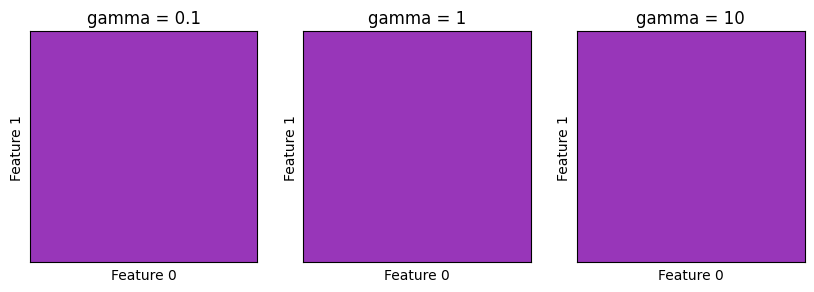

In [7]:
C = 1.0  # SVM 的正则化参数
models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
    svm.SVC(kernel='rbf', gamma=1, C=C),
    svm.SVC(kernel='rbf', gamma=10, C=C))
models = (clf.fit(X,y) for clf in models)

# 设定图题
titles = ('gamma = 0.1',
    'gamma = 1',
    'gamma = 10',)

# 设定一个子图形的个数和排列方式
fig, sub = plt.subplots(1, 3, figsize=(10, 3))

# 使用前面定义的函数进行画图
X0, X1 = X[:,0],X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

【结果分析】从图中， 可以看出，自左至右 gamma 值从 0.1 增加到 10 ，

gamma 值越小，则 RBF 内核的直径越大， 这样就会有更多的点被模型圈进决定边界， 

所以决定边界也就越平滑， 这时的模型也就越简单； 

而随着参数的增加， 模型则更倾向于出现过拟合的问题。

而至于正则化参数 C， 读者朋友可以参见我们在第 4 章线性模型的介绍， 

C 值越小，模型就越受限， 也就是说单个数据点对模型的影响越小， 模型就越简单；

而 C 值越大， 每个数据点对模型的影响就越大， 模型也就会更加复杂。

### SVM 算法的优势与不足

SVM 可以说是在机器学习领域非常强大的算法了， 对各种不同类型的数据集都有不错的表现。 

它可以在数据特征很少的情况下生成非常复杂的决定边界， 当然特征数量很多的情况下表现也不错，

换句话说， SVM 应对高维数据集和低维数据集都还算是得心应手。

但是，前提条件是数据集的规模不太大。

如果数据集中的样本数量在 1 万以内，SVM 都能驾驭得了，

但如果样本数量超过 10 万的话， SVM 就会非常消耗时间和内存。

SVM 还有一个短板， 就是对于数据预处理和参数调节要求非常高。

所以现在很多场景下大家都会更乐意用我们上一章中介绍的随机森林算法或者是梯度上升决策时（GBDT）算法了。

因为它们不需要对数据做预处理，也不用费尽心机去调参。

而且对于非专业人士来说， 随机森林和梯度上升决策树要比 SVM 更容易理解，

毕竟SVM 算法的建模过程比较难以呈现的。

不管怎么说， SVM 还是有价值的。 

假设数据集中样本特征的测度都比较接近， 例如在图像识别领域， 

还有样本特征和样本数比较接近的时候， SVM 都会游刃有余。

需要请读者朋友留意的是， 在 SVM 算法中，有 3 个参数是比较重要的：

第一个是核函数的选择；

第二个是核函数的参数， 例如 RBF 的 gamma 值；

第三个是正则化参数 C。

RBF 内核的 gamma 值是用来调节内核宽度的，

gamma 值和 C 值一起控制模型的复杂度， 数值越大模型越复杂，

而数值越小的模型越简单。实际应用中， gamma 值和 C 值往往要一起调节，

才能达到最好的效果。

## SVM 实例 -- 波士顿房价回归分析

前面介绍了支持向量机 SVM 在分类任务中的应用， 下面我们再通过一个实例来介绍 SVM 在回归分析中的应用。 

在 scikit-learn 中， 内置了一个非常合适做回归分析的数据集， 波士顿房价数据集， 

在这一小节中， 我们将使用该数据集为大家讲解 SVM 中用于回归分析的 SVR 的用法。

### 初步了解数据集

首先还是让我们先了解一下数据集的大致情况。

In [8]:
# 导入波士顿房价数据集
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


【结果分析】从从结果中可以看出， 波士顿房价数据集中有 4 个键，

分别是数据、目标、特征名称和短描述。细心的读者可能发现，

波士顿房价数据集比红酒数据集少了一个键， 就是目标名称（target_names）,

这是为什么呢？

让我们看一下数据描述里怎么说的。

输入代码如下：

In [9]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

【结果分析】从上面这段描述中可以看出， 数据集中共有 506 个样本， 

每个样本有 13 个特征变量。 而后面还有一个叫作中位数的第 14 个变量，

这个变量就是该数据集中的 target。

现在我们继续往下看数据描述。。。

【结果分析】从数据描述中， 我们可以看到， 原来这个变量是业主自主房屋价格的中位数，

以千美元为单位。怪不得这个数据集把它作为 target 呢！ 那么接下来我们的任务， 

就是通过 SVR 算法， 来建立一个房价预测模型。

### 使用 SVR 进行建模

接下来， 我们要先制作训练集数据集和测试数据集， 输入代码如下：

In [10]:
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
# 建立训练数据集和测试数据集
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


图中说明训练数据集和测试数据集我们已经准备好了，下面开始用 SVR 进行建模。

我们前面介绍了 SVM 的两种核函数： “Linear” 和 “rbf”，

不过我们不知道这两种核函数哪一个会让模型变现得更好， 那么我们就分别尝试一下，

In [11]:
# 导入支持向量机回归模型
from sklearn.svm import SVR
# 分别测试 linear 核函数和 rbf 核函数
for kernal in ['linear', 'rbf']:
    svr = SVR(kernel=kernal)
    svr.fit(X_train, y_train)
    print(kernal, '核函数的模型训练集得分: {:.3f}'.format(svr.score(X_train, y_train)))
    print(kernal, '核函数的模型测试集得分: {:.3f}'.format(svr.score(X_test, y_test)))

linear 核函数的模型训练集得分: 0.709
linear 核函数的模型测试集得分: 0.696
rbf 核函数的模型训练集得分: 0.192
rbf 核函数的模型测试集得分: 0.222


【结果分析】从结果中看到， 两种核函数的模型得分都不能令人满意。

使用了 “linear” 核函数的模型在训练集得分只有 0.709，

而在训练集只有 0.696. 不过使用 “rbf” 核函数的模型更糟糕，

在训练数据集的份只有 0.192，

而在测试集的得分只有 0.222.

这是什么原因呢？ 我们来思考一下，会不会是数据集的各个特征之间的量级差的比较远呢？

正如我们在 7.3.1 节所说， SVM 算法对于数据预处理的要求是比较高的，

如果数据特征量级差异较大， 我们就需要对数据进行预处理。

所以现在我们先来用图形可视化的方法看一看数据集中各个特征的数量级是什么情况，

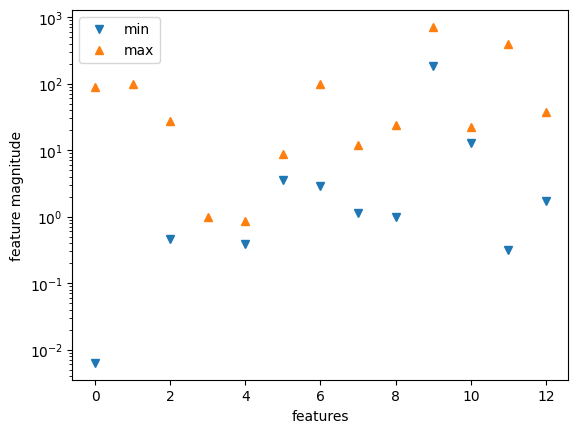

In [12]:
# 将特征数值中的最小值和最大值用散点画出来
plt.plot(X.min(axis=0), 'v', label="min")
plt.plot(X.max(axis=0), '^', label="max")
# 设定纵坐标为对数形式
plt.yscale('log')
# 设置图注位置为最佳
plt.legend(loc='best')
# 设定横纵轴标题
plt.xlabel('features')
plt.ylabel('feature magnitude')

plt.show()

【结果分析】从图中可以看到，在波士顿房价数据集中，各个特征的量级差异还是比较大的，

第一个特征“城市犯罪率”最小值的在 10^-2, 最大值达到了 10^2 (这很可能是一个错误的数据点，

犯罪率应该不会如此之高)。 而第十个特征“税收”的最小值和最大值都在 10 到 10^2 之间。

为了能够让 SVM 算法能够更好地对数据进行拟合， 我们必须对数据集进行预处理，输入代码如下

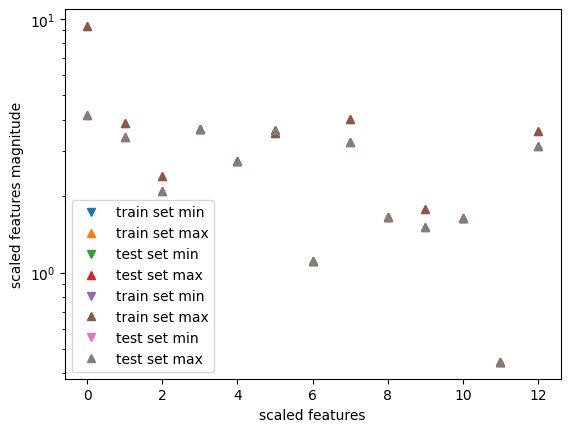

In [14]:
# 导入数据预处理工具
from sklearn.preprocessing import StandardScaler

# 对训练集和测试集进行数据预处理
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 将预处理后的数据特征最大值和最小值用散点图表示出来
plt.plot(X_train_scaled.min(axis=0), 'v', label='train set min')
plt.plot(X_train_scaled.max(axis=0), '^', label='train set max')
plt.plot(X_test_scaled.min(axis=0), 'v', label='test set min')
plt.plot(X_test_scaled.max(axis=0), '^', label='test set max')
plt.yscale('log')

# 设置图注位置
plt.legend(loc='best')

# 设置横纵轴标题
plt.xlabel('scaled features')
plt.ylabel('scaled features magnitude')

# 显示图像
plt.show()

【结果分析】从图中， 可以看出，经过了我们的预处理， 不管是训练集还是测试集， 

基本上所有的特征最大值都不会超过 10，而最小值也都趋近于 0， 以至于在图中我们已经看不到它们了。

这和我们使用的预处理的工具原理有关，后面章节， 我们还会详细介绍数据预处理的方法。

现在我么再试试用经过预处理的数据来训练模型， 看看劫夺会有什么不同，

输入代码如下：

In [15]:
# 用预处理后的数据重新训练模型
for kernal in ['linear', 'rbf']:
    svr = SVR(kernel=kernal)
    svr.fit(X_train_scaled, y_train)
    print('数据预处理后', kernal, '核函数的模型训练集得分：{:.3f}'.format(svr.score(X_train_scaled, y_train)))
    print('数据预处理后', kernal, '核函数的模型测试集得分：{:.3f}'.format(svr.score(X_test_scaled, y_test)))

数据预处理后 linear 核函数的模型训练集得分：0.706
数据预处理后 linear 核函数的模型测试集得分：0.698
数据预处理后 rbf 核函数的模型训练集得分：0.665
数据预处理后 rbf 核函数的模型测试集得分：0.695


【结果分析】从结果中可以看到，经过预处理之后，“linear” 内核的 SVR 得分变化不大，

而 “rbf” 内核的 SVR 得分有了巨大的提升。 尤其在测试集中的得分， 从 0.001 分直接提升到 0.694，

已经非常接近 “linear” 内核的模型了，那么我们如果我们进一步调整 “rbf” 内核的 SVR 模型参数， 

会不会让它的表现进一步提升呢？ 下面我们来实验一下。

和 SVC 一样， SVR 模型也有 gamma 和 C 两个参数，接下来我们试着对两个参数进行修改， 输入代码如下

In [16]:
# 设置模型的 C 参数和 gamma 参数
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)

print('调节参数后的模型训练集得分：{:.3f}'.format(svr.score(X_train_scaled, y_train)))
print('调节参数后的模型测试集得分：{:.3f}'.format(svr.score(X_test_scaled, y_test)))

调节参数后的模型训练集得分：0.966
调节参数后的模型测试集得分：0.894


【结果分析】这是一个比较不错的结果， 我们看到通过参数调节， 

“rbf” 内核的 SVR 模型在训练集的得分已经高达 0.966，而在测试集的得分也达到了 0.894，

可以说现在模型的表现已经是可以接受的。

## 小结

在本章中， 我们一起学习了支持向量机 SVM 算法的基本原理， 以及它的 “linear” 核函数和 “rbf” 核函数，

还有参数 C 和 gamma 的调节。 最后我们使用了一个真实的数据集 -- 波士顿房价数据集训练了我们的 SVR 模型。 

在这个实例中， 我们一步一步地通过对数据进行预处理和对参数进行调节， 使 “rbf” 内核的 SVR 模型在测试集中的

得分从 0.001 飙升到了 0.894， 通过这个案例， 我们可以清晰地了解到 SVM 算法对于数据预处理和调参到要求都是非常高的了。

而在下一章中， 我们将向大家介绍时下非常热门的算法 -- 神经网络。

